## Pricing of Options with Black-Scholes Model
###### Author: E.Delali

The Black-Scholes model, also known as the Black-Scholes-Merton (with dividend) model, is a mathematical model used for estimating the prices of an option contract based on other investment instruments, taking into account the impact of time and other risk factors. It is regarded as the best method for estimating option prices. 

An option contract enables its owner to buy or sell an underlying asset at a price, also known as strike price. The owner of the option contract may buy or sell the asset at the given price, but he may also decide not to do it if the asset’s price isn’t advantageous.

There are two types of options : A Call option (the holder has the right to buy an asset at an agreed strike price)  put option (he holder has the right to sell an asset at an agreed strike price).

In addition, there are also two different ways options are exercised: European options and American Options. European options can be exercised only at expiration or maturity, while American options can be exercised at any time or during the entire lifetime of the option, hence more valuable. All options considered in this work can only be exercised at expiration, hence are European options.


### Input Variables
The Black-Scholes model requires five input variables: the strike price of an option, the current stock price, the time to expiration, the risk-free rate, and the volatility.

- $S_0$     - Current price/spot price of the underlying or Asset / The stock’s current market price
- $X$     - The strike price at which the option can be exercised; if we exercise the option, we can buy the stock at the strike price X
- $r$           - Riskless rate of interest
- $σ/stdev$     - Volatility. That is, the standard deviation of the underlying asset
- $T$           - Term of the option

### Formula 
 Below are the Call and Put options for the Black-Scholes model under consideration. 
 
call option price:
$C = S_0N(d_1) - Xe^{-rT}N(d_2)$
     
put option price: 
$P = Xe^{-rT}N(-d_2) - S_0N(-d_1)$

with,

$$
d_1 = \frac{\ln \left(\frac{S_0}{X}\right) + \left(r + \frac{stdev^2}{2}\right)T}{stdev \cdot \sqrt{T}}
$$

$$
d_2 = d_1 - stdev \cdot \sqrt{T} = \frac{\ln \left(\frac{S_0}{X}\right) + \left(r - \frac{stdev^2}{2}\right)T}{stdev \cdot \sqrt{T}}
$$

where,

- ln = natural logarithm
- e = basis of the natural logarithm = 2.7128. . .
- N(d) = cumulative standard normal distribution

Therefore, the valuation of an option at time T = 0 (c or p) is thus influenced by the current share price $S_0$, the exercise price X, the term of the option T, the riskless rate of interest r as well as two weights N(d). 


### Note - CDF:
- The cumulative distribution shows how the data accumulates in time, its output can never be below zero or above one.
- So Norm CDF will take as an argument a value from the data and will show us what portion of the data lies below that value. 


### Exploratory Data Analysis
Consider an investor who would like to invest in BASF. BASF Data was obtained from yahoo finance with the ticker 'BAS.DE' 

In [1]:
#import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
import seaborn as sns
sns.set()

# set plotting parameters
%matplotlib inline
#sns.set_style("whitegrid")
plt.rc("figure", figsize=(12, 8))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

#### The Data
- The data extrated is a time series data for every trading day. 

-  We download historical market data from yahoo finance for BASF (BAS.DE). The dataset consists of daily market data such as open, high, low and close prices ranging from 2017-01-01 to 2021-12-31.

- The BASF market data obtained from yahoo finance is made up of 1267 rows and 6 columns. All columns have 255 non-null values (no missing value).

- The adjusted closing price for the first few years is smaller compared to the closing price as in the table above. The difference is due to dividends paid to stock owners as well as other changes in stock price such as stock splits, increase in capital etc. 

- The date column only include trading days. That is to say that, the date column excludes Saturdays, Sundays and National Holidays as stock markets are not opened on such days.  

- It is worth nothing that, the first two rows (Table descriction) are not counted as part of the rows with data. The first row is the row with data with a date of "2017-01-02". Row one is the next row and so on.

In [2]:
BASF_data = wb.DataReader('BAS.DE', data_source = 'yahoo', start = '2017-01-01', end = '2021-12-31')
BASF_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,88.809998,87.099998,87.500000,88.699997,1245318.0,61.303570
2017-01-03,88.879997,87.419998,88.879997,87.699997,2806564.0,60.612434
2017-01-04,88.150002,87.269997,87.889999,88.150002,1955701.0,60.923443
2017-01-05,88.250000,87.389999,87.540001,87.790001,1753933.0,60.674637
2017-01-06,87.730003,87.269997,87.500000,87.519997,1518979.0,60.488041
...,...,...,...,...,...,...
2021-12-23,60.939999,60.180000,60.180000,60.830002,1889040.0,56.727203
2021-12-27,61.500000,60.500000,60.650002,61.290001,1405892.0,57.156178
2021-12-28,61.930000,61.259998,61.299999,61.700001,1576927.0,57.538525


In [3]:
#General inforamtion about the data : This includes the row index, column names and the number of non-zero values.

BASF_data.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2017-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1267 non-null   float64
 1   Low        1267 non-null   float64
 2   Open       1267 non-null   float64
 3   Close      1267 non-null   float64
 4   Volume     1267 non-null   float64
 5   Adj Close  1267 non-null   float64
dtypes: float64(6)
memory usage: 69.3 KB


- Now we extract the column needed for estimating the Call and Put option prices. This is the Adjusted Closing Price.


- The stock's closing price is modified by the adjusted closing price to reflect the stock's worth following any corporate actions such as dividends paid to stock owners and other changes such to stock price such as stock splits etc. 


- When analyzing historical returns or performing a thorough analysis of past performance, it is frequently used.

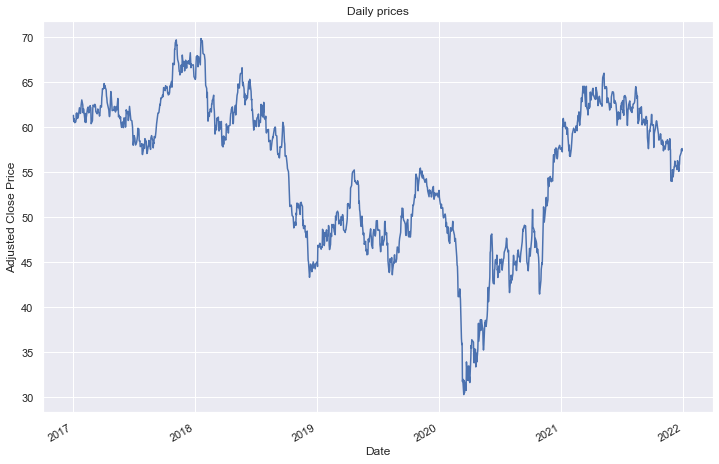

In [4]:
BASF = BASF_data['Adj Close']
BASF.head()

BASF.plot()
plt.title('Daily prices')
plt.ylabel('Adjusted Close Price')
plt.show()

#ticker = 'BAS.DE'  
#BASF = pd.DataFrame()  
#BASF[ticker] = wb.DataReader(ticker, data_source='yahoo', start = '2021-01-01', end = '2021-12-31')['Adj Close']
#BASF

###### Log Returns
- Log returns : Instead of simple rates of return, we could use logarithmic rates of return, also called log returns. 
- We calculate the daily returns of the BASF Stock. The log returns formula is given by:
$$
ln(\frac{P_t}{P_{t-1}})
$$
-As we can see from the graph below, our time series has a stable trend and now they are moving around zero. The sharpe of the distribution is clearly seen in the second graph. This further implies that our log return's data is normally distributed and have a stable mean. We can conclude then that, our time series are now closer to stationarity and we can use them for our analysis.

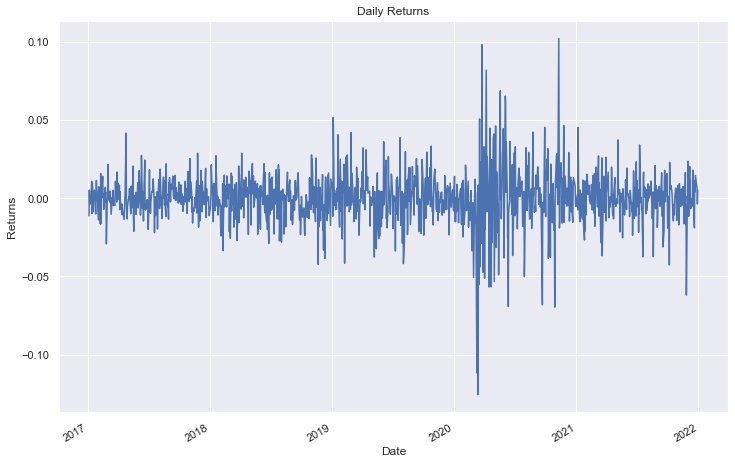

Text(8.120000000000005, 0.5, 'Frequency')

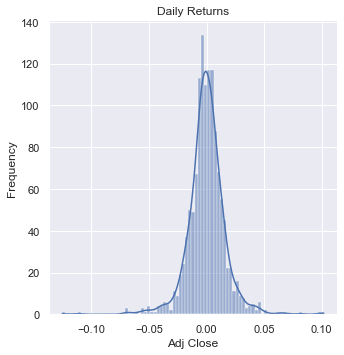

In [5]:
log_returns = np.log(1 + BASF.pct_change()) 

log_returns.plot()
plt.title("Daily Returns")
plt.ylabel("Returns")
plt.show()

sns.displot(log_returns, kde=True)
plt.title("Daily Returns")
plt.ylabel("Frequency")

### Call and Put Option Pricing

- We define the following functions for d1,d2, call price and put price. For coding seek let $S_0=S$
-  we then create a variable S, which is equal to the last adjusted closing price of BASF. We use the “iloc” method. This method will deliver the current stock price.

In [6]:
def d1(S, X, r, stdev, T):
    return (np.log(S / X) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, X, r, stdev, T):
    return (np.log(S / X) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM_call(S, X, r, stdev, T):
        return (S * norm.cdf(d1(S, X, r, stdev, T))) - (X * np.exp(-r * T) * norm.cdf(d2(S, X, r, stdev, T)))
    
def BSM_put(S, X, r, stdev, T):
        return ((X * np.exp(-r * T) * norm.cdf(-d2(S, X, r, stdev, T))) - S * norm.cdf(-d1(S, X, r, stdev, T)))

In [7]:
#current stock price

S = BASF.iloc[-1]      
S

57.61312484741211

### Standard Deviation
- Another argument we could extract from the data is the standard deviation (volatility). In our case, we will use an approximation of the standard deviation of the logarithmic returns of this stock.


- We store the annual standard deviation of the log returns in a variable called “stdev”.

In [8]:
stdev = log_returns.std() * 250 ** 0.5           
stdev   

0.2588522969214626

- Set the risk free rate $r$, equal to 2.5% (0.025); the strike price $X$, equal to 48.0; and the time horizon $T$ equal to 1, respectively.

In [9]:
r = 0.025
X = 48
T = 1

### Estimate the $d1$ and $d2$ functions with the relevant arguments to obtain their values.

In [10]:
d1(S, X, r, stdev, T)

0.9312324111054737

In [11]:
d2(S, X, r, stdev, T)

0.672380114184011

### Call and Put Prices 

Use the BSM function to estimate the price of a call option, given you know the values of S, K, r, stdev, and T.
We can calculate the price of the call option. We will stick to a risk free rate of 2.494% (approxiamtely 2.5%) corresponding to a 10 year German government bond.  

In [12]:
call_price = BSM_call(S, X, r, stdev, T)
print("Call Price: ", str(call_price))

Call Price:  12.40114582448799


In [13]:
put_price = BSM_put(S, X, r, stdev, T)
print("Put price: ", str(put_price))

Put price:  1.6028967544358537



### Conclusion

The call and put option prices for the BASF stock are 12.40 and 1.60 respectively.

- NB: It is possible for the price of an option (Call and Put) to be much lower than the actual stock price. This is because the value of the option depends on multiple parameters, such as strike price, time to maturity and volatility. And it is not directly proportional to the price of the security.